In [413]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [414]:
df = pd.read_csv('Breast_Cancer.csv')

In [415]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


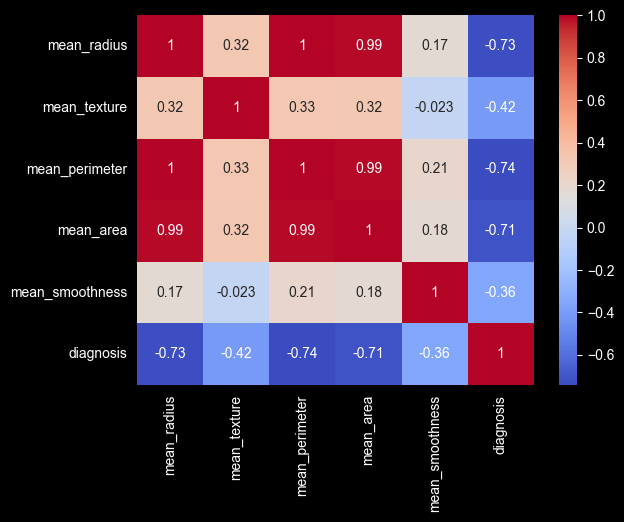

In [416]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [417]:
#df['diagnosis'] = df['diagnosis'].map({'Malignant': 0,'Benign': 1})

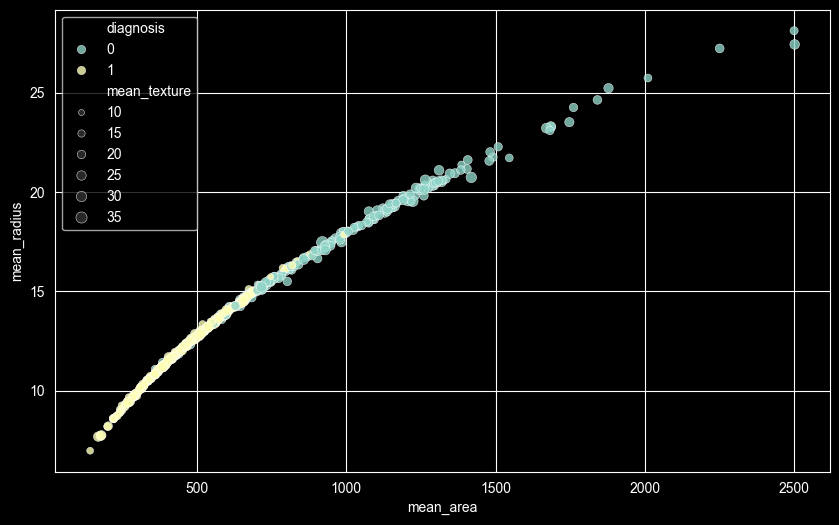

In [418]:
plt.figure(figsize=(10, 6))
sc=sns.scatterplot(x='mean_area', y='mean_radius', hue='diagnosis', data=df, alpha=0.8, size='mean_texture')
plt.show()

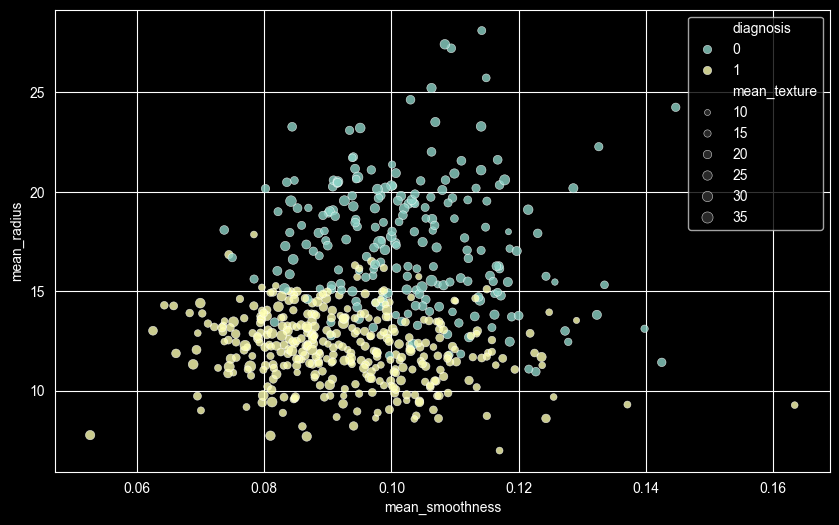

In [419]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_smoothness', y='mean_radius', hue='diagnosis', data=df, alpha=0.8, size='mean_texture')
plt.show()

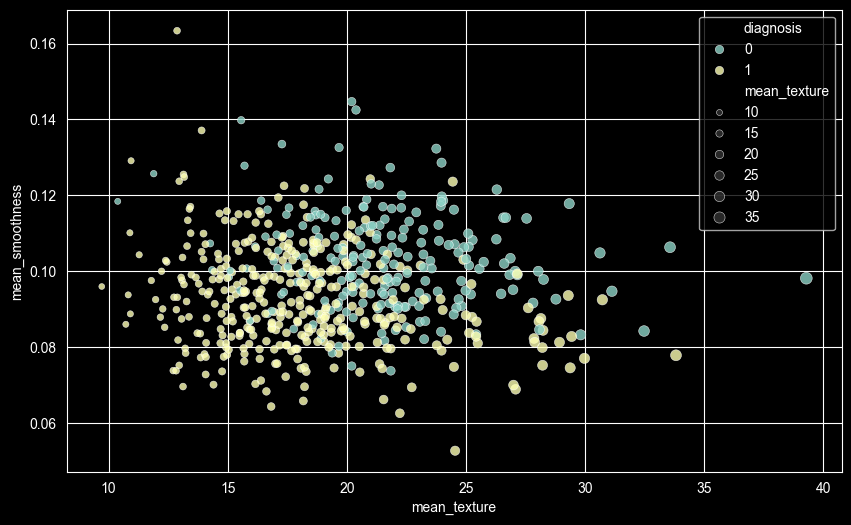

In [420]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_texture', y='mean_smoothness', hue='diagnosis', data=df, alpha=0.8, size='mean_texture')
plt.show()

In [421]:
df['mean_radius'] = pd.qcut(df['mean_radius'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], duplicates='drop')

In [422]:
df['mean_texture'] = pd.qcut(df['mean_texture'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6'], duplicates='drop')

In [423]:
df['mean_perimeter'] = pd.qcut(df['mean_perimeter'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5'], duplicates='drop')

In [424]:
df['mean_area'] = pd.qcut(df['mean_area'], q=8, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8'], duplicates='drop')

In [425]:
df['mean_smoothness'] = pd.qcut(df['mean_smoothness'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], duplicates='drop')

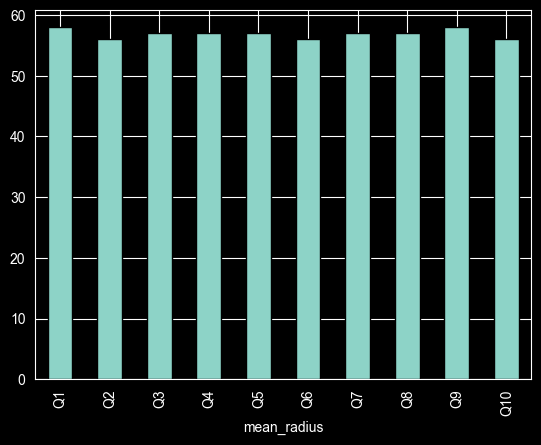

In [426]:
df['mean_radius'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

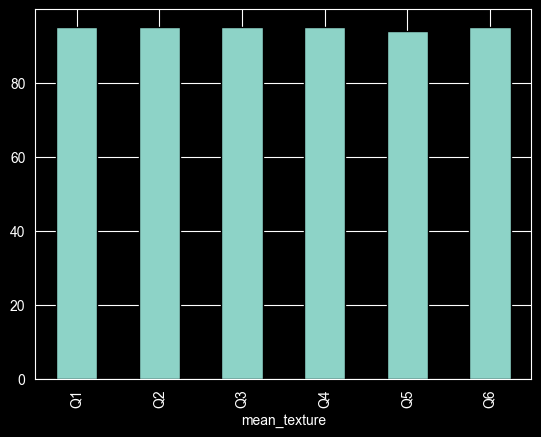

In [427]:
df['mean_texture'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

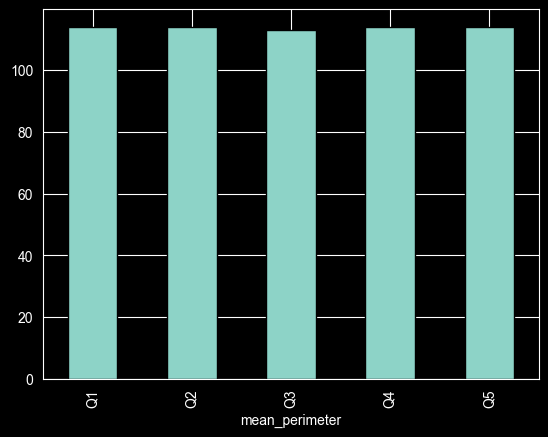

In [428]:
df['mean_perimeter'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

In [429]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [430]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(398, 5) (171, 5) (398,) (171,)


In [431]:
df.sample(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
421,Q7,Q1,Q4,Q6,Q7,1
415,Q3,Q5,Q2,Q3,Q6,1
301,Q4,Q4,Q2,Q3,Q3,1


In [432]:
def model_probs(X_train, y_train, target_col):
    df = pd.concat([X_train, y_train], axis=1)
    ptot = len(df)
    pk = df[target_col].value_counts()
    pki = {}

    for col in df.columns:
        if col == target_col:
            continue
        counts = df.groupby([target_col, col]).size().to_dict()
        pki[col] = counts

    return ptot, pk, pki

In [433]:
laplace={}
ptot, pk, pki=model_probs(X_train, y_train, 'diagnosis')
def Naive_Bayes_Model(row):
    EPS = 1.0
    C_Probs = {}
    for c in pk.index:
        pc_count = pk[c]
        logSum = np.log(pc_count / ptot)

        for col_name, col_value in row.items():
            col_counts = pki.get(col_name, {})
            count_in_col = col_counts.get((c, col_value), 0)

            Vj = laplace.get(col_name, 1)
            prob = (count_in_col + EPS) / (pc_count + EPS * Vj)
            logSum += np.log(prob)

        C_Probs[c] = logSum


    ans = max(C_Probs, key=C_Probs.get)
    return ans

C:\Users\ofeks\AppData\Local\Temp\ipykernel_179736\2318157450.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([target_col, col]).size().to_dict()
C:\Users\ofeks\AppData\Local\Temp\ipykernel_179736\2318157450.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([target_col, col]).size().to_dict()
C:\Users\ofeks\AppData\Local\Temp\ipykernel_179736\2318157450.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

In [434]:
y_pred = X_test.apply(lambda row: Naive_Bayes_Model(row), axis=1)

In [435]:
y_pred_train = X_train.apply(lambda row: Naive_Bayes_Model(row), axis=1)

In [436]:
def conf_matrix(y_true, y_pred):
    return pd.crosstab(y_true, y_pred).to_numpy()

In [454]:
print(conf_matrix(y_test, y_pred))

[[57  6]
 [ 9 99]]


In [455]:
print(conf_matrix(y_train, y_pred_train))

[[126  23]
 [ 20 229]]


In [439]:
cm = conf_matrix(y_test, y_pred)


In [440]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [441]:
Accuracy = (TN+TP) / (TP+TN+FP+FN)
Precision = TP / (TP+ FP)
Recall = TP / (TP+FN)
F1_Score = 2 *(Precision * Recall / (Precision + Recall))

In [442]:
print(f'Accuracy:{Accuracy},\nPrecision: {Precision},\nRecall: {Recall},\nF1_Score: {F1_Score}')

Accuracy:0.9122807017543859,
Precision: 0.9428571428571428,
Recall: 0.9166666666666666,
F1_Score: 0.9295774647887323


In [452]:
Naive = pd.DataFrame({
    'Breast Cancer': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [Accuracy, Precision, Recall, F1_Score]
}).set_index('Breast Cancer')
(Naive*100).map(lambda x: round(x, 2))

,Value
Breast Cancer,
Accuracy,91.23
Precision,94.29
Recall,91.67
F1 Score,92.96


In [453]:
cm = conf_matrix(y_train, y_pred_train)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
Accuracy = (TN+TP) / (TP+TN+FP+FN)
Precision = TP / (TP+ FP)
Recall = TP / (TP+FN)
F1_Score = 2 *(Precision * Recall / (Precision + Recall))
print(f'Accuracy:{Accuracy},\nPrecision: {Precision},\nRecall: {Recall},\nF1_Score: {F1_Score}')
Naive_Train = pd.DataFrame({
    'Breast Cancer': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [Accuracy, Precision, Recall, F1_Score]
}).set_index('Breast Cancer')
(Naive_Train*100).map(lambda x: round(x, 2))

Accuracy:0.8919597989949749,
Precision: 0.9087301587301587,
Recall: 0.9196787148594378,
F1_Score: 0.9141716566866267


,Value
Breast Cancer,
Accuracy,89.20
Precision,90.87
Recall,91.97
F1 Score,91.42


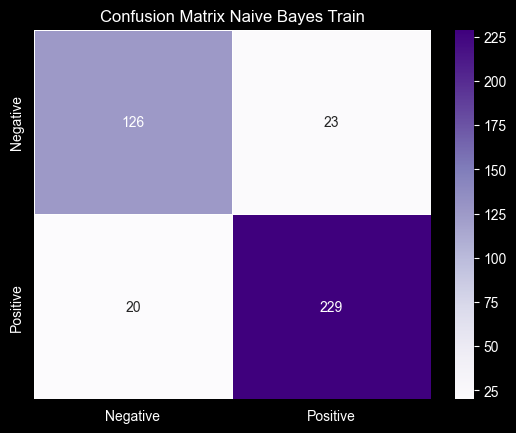

In [476]:
cm = conf_matrix(y_true=y_train,y_pred=y_pred_train)
plt.title("Confusion matrix naive bayes train".title())
sns.heatmap(cm, annot=True, fmt='', cmap='Purples', linewidths=.5,
xticklabels=['Negative', 'Positive'],  # Change X-axis labels
yticklabels=['Negative', 'Positive']   # Change Y-axis labels
)
plt.show()


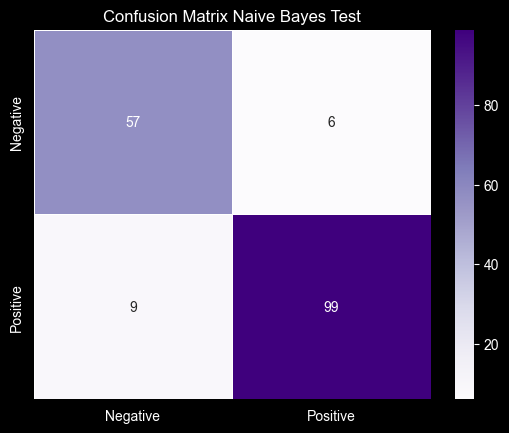

In [478]:
cm = conf_matrix(y_true=y_test,y_pred=y_pred)
plt.title("Confusion matrix naive bayes test".title())
sns.heatmap(cm, annot=True, fmt='', cmap='Purples', linewidths=.5,
xticklabels=['Negative', 'Positive'],  # Change X-axis labels
yticklabels=['Negative', 'Positive']   # Change Y-axis labels
)
plt.show()